In [1]:
from datasets import load_dataset

In [2]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("dongx1997/NutriBench", "v2")

README.md: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00000-of-00001.parquet:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15617 [00:00<?, ? examples/s]

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['meal_description', 'carb', 'fat', 'energy', 'protein', 'country', 'serving_type'],
        num_rows: 15617
    })
})

In [11]:
ds['train']

Dataset({
    features: ['meal_description', 'carb', 'fat', 'energy', 'protein', 'country', 'serving_type'],
    num_rows: 15617
})

In [14]:
ds['train']['meal_description'][10]

'So, my lunch includes 72g of maize flour, 17g of okra leaves, 5g of onion, 16g of tomato, and 85g of mango.'

In [15]:
ds['train']['carb'][10]

74.1

In [16]:
ds['train']['fat'][10]

1.7000000000000002

In [17]:
ds['train']['energy'][10]

336.0

In [18]:
ds['train']['protein'][10]

6.6

In [19]:
ds['train']['country'][10]

'ZMB'

In [20]:
ds['train']['serving_type'][10]

'metric'

In [24]:
import pandas as pd
pd.DataFrame(ds['train'])

,meal_description,carb,fat,energy,protein,country,serving_type
0,"For breakfast, I ate a plain bun weighing 126 ...",90.80,4.20,439.00,9.60,ZMB,metric
1,"For lunch, I had 171 grams of boiled fresh gro...",97.80,37.80,806.00,27.90,ZMB,metric
2,"I’ve got 9 grams of boiled kasepa fish, 34 gra...",51.20,14.20,363.00,8.70,ZMB,metric
3,I had a breakfast consisting of 51g of raw whi...,163.80,8.90,792.00,19.00,ZMB,metric
4,"For dinner, I had 105g of raw maize flour alon...",81.10,4.60,390.00,8.40,ZMB,metric
...,...,...,...,...,...,...,...
15612,"For dinner, I'm having a cup of prepared noodl...",40.79,12.52,299.56,6.28,USA,natural
15613,I'm snacking on a cup of banana chips.,42.05,24.19,373.68,1.66,USA,natural
15614,I’ve got a piece of chewing gum along with a 6...,7.89,0.01,29.19,0.00,USA,natural
15615,"For breakfast, I'm having a McDonald's sandwic...",39.68,27.69,523.20,27.47,USA,natural


In [25]:
df_train = pd.DataFrame(ds['train'])

In [30]:
numeric_features = ['carb', 'fat', 'energy', 'protein']

df_train[numeric_features].describe()


,carb,fat,energy,protein
count,15617.000000,15617.000000,15617.000000,15617.000000
mean,52.321347,14.796468,396.003725,13.863180
std,44.046533,15.770686,311.221795,14.320597
min,0.000000,0.000000,0.000000,0.000000
25%,23.260000,4.060000,182.000000,3.600000
50%,43.360000,10.380000,329.320000,10.170000
75%,69.930000,20.640000,524.080000,19.200000
max,1289.300000,218.500000,6641.000000,191.300000


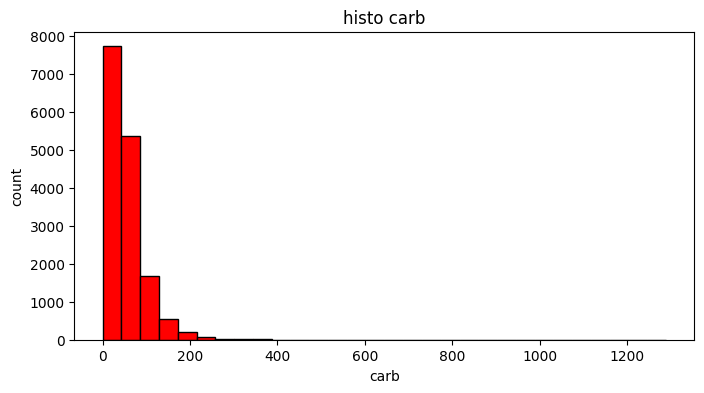

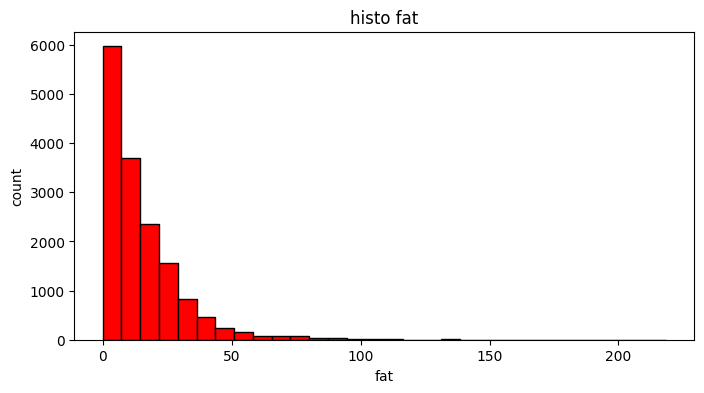

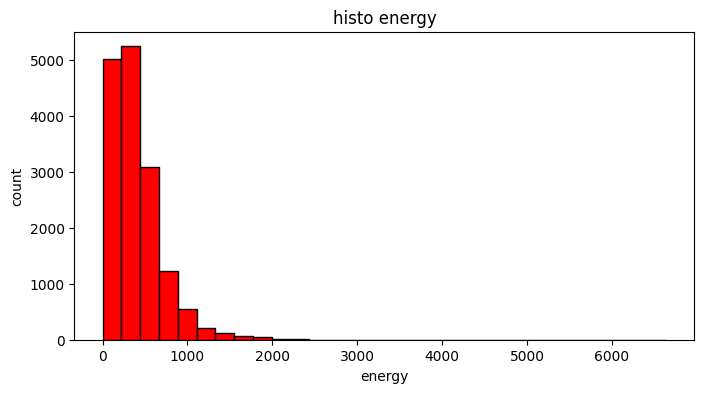

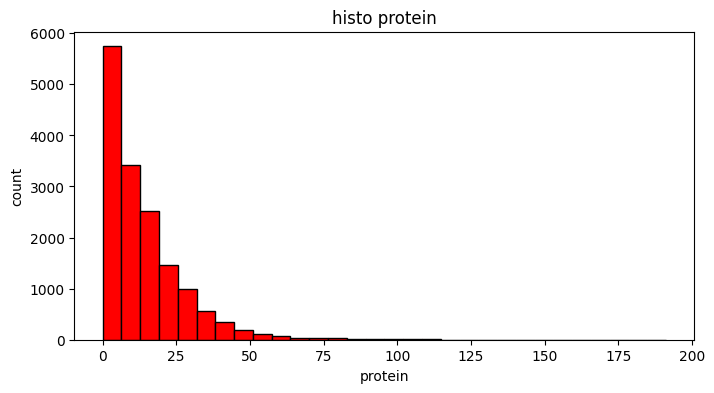

In [36]:
import matplotlib.pyplot as plt

for col in numeric_features:
    plt.figure(figsize=(8,4))
    plt.hist(df_train[col], bins=30, color='red', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title(f'histo {col}')
    plt.show()


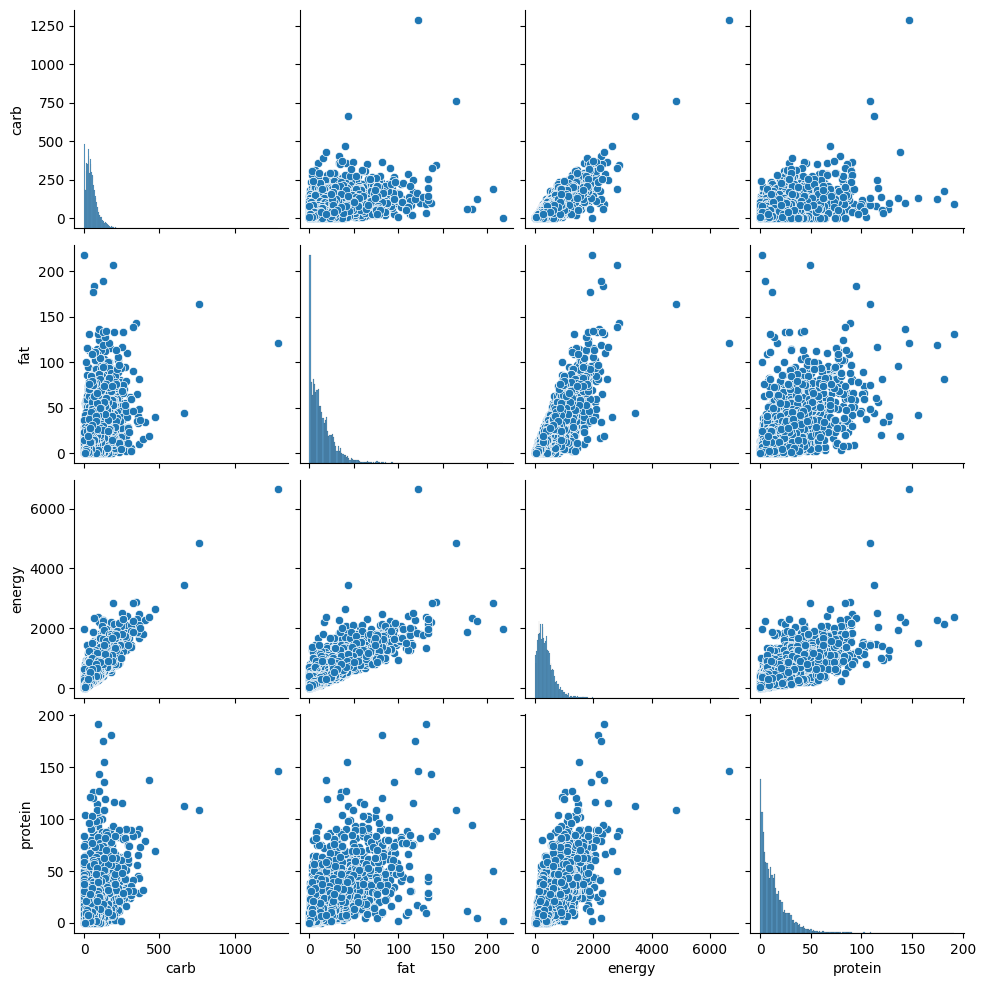

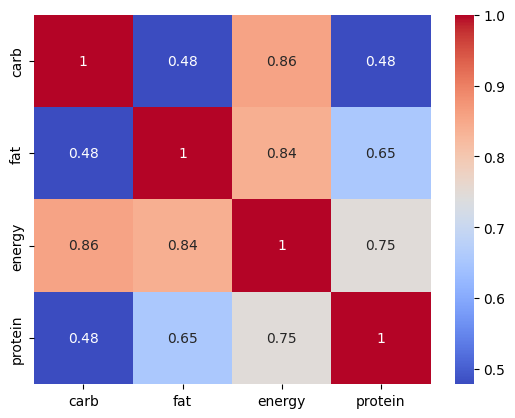

In [37]:
import seaborn as sns

sns.pairplot(df_train[numeric_features])
plt.show()

sns.heatmap(df_train[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.show()


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - ----------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


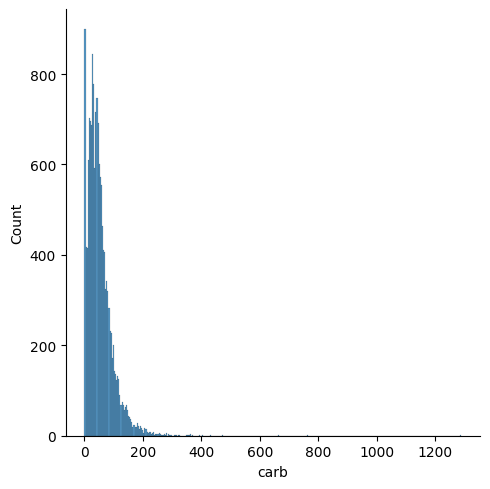

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['carb', 'fat', 'energy', 'protein']

sns.displot(df_train['carb'])

In [41]:
df_train.isna()

,meal_description,carb,fat,energy,protein,country,serving_type
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
15612,False,False,False,False,False,False,False
15613,False,False,False,False,False,False,False
15614,False,False,False,False,False,False,False
15615,False,False,False,False,False,False,False


In [44]:
df_train.isnull()

,meal_description,carb,fat,energy,protein,country,serving_type
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
15612,False,False,False,False,False,False,False
15613,False,False,False,False,False,False,False
15614,False,False,False,False,False,False,False
15615,False,False,False,False,False,False,False


In [46]:
df_train

,meal_description,carb,fat,energy,protein,country,serving_type
0,"For breakfast, I ate a plain bun weighing 126 ...",90.80,4.20,439.00,9.60,ZMB,metric
1,"For lunch, I had 171 grams of boiled fresh gro...",97.80,37.80,806.00,27.90,ZMB,metric
2,"I’ve got 9 grams of boiled kasepa fish, 34 gra...",51.20,14.20,363.00,8.70,ZMB,metric
3,I had a breakfast consisting of 51g of raw whi...,163.80,8.90,792.00,19.00,ZMB,metric
4,"For dinner, I had 105g of raw maize flour alon...",81.10,4.60,390.00,8.40,ZMB,metric
...,...,...,...,...,...,...,...
15612,"For dinner, I'm having a cup of prepared noodl...",40.79,12.52,299.56,6.28,USA,natural
15613,I'm snacking on a cup of banana chips.,42.05,24.19,373.68,1.66,USA,natural
15614,I’ve got a piece of chewing gum along with a 6...,7.89,0.01,29.19,0.00,USA,natural
15615,"For breakfast, I'm having a McDonald's sandwic...",39.68,27.69,523.20,27.47,USA,natural


In [48]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['carb', 'fat', 'energy', 'protein']

scaler = StandardScaler()
df_train_scaled = df_train.copy()  
df_train_scaled[numeric_features] = scaler.fit_transform(df_train[numeric_features])


df_train_scaled.head()


,meal_description,carb,fat,energy,protein,country,serving_type
0,"For breakfast, I ate a plain bun weighing 126 ...",0.873619,-0.671931,0.138158,-0.297705,ZMB,metric
1,"For lunch, I had 171 grams of boiled fresh gro...",1.032547,1.458673,1.317419,0.980215,ZMB,metric
2,"I’ve got 9 grams of boiled kasepa fish, 34 gra...",-0.025459,-0.037823,-0.106049,-0.360554,ZMB,metric
3,I had a breakfast consisting of 51g of raw whi...,2.531010,-0.373900,1.272433,0.358713,ZMB,metric
4,"For dinner, I had 105g of raw maize flour alon...",0.653390,-0.646566,-0.019291,-0.381503,ZMB,metric


In [50]:
from sklearn.preprocessing import MinMaxScaler

numeric_features = ['carb', 'fat', 'energy', 'protein']

scaler = MinMaxScaler()
df_train_minmax = df_train.copy() 
df_train_minmax[numeric_features] = scaler.fit_transform(df_train[numeric_features])

df_train_minmax.head()


,meal_description,carb,fat,energy,protein,country,serving_type
0,"For breakfast, I ate a plain bun weighing 126 ...",0.070426,0.019222,0.066105,0.050183,ZMB,metric
1,"For lunch, I had 171 grams of boiled fresh gro...",0.075855,0.172998,0.121367,0.145844,ZMB,metric
2,"I’ve got 9 grams of boiled kasepa fish, 34 gra...",0.039711,0.064989,0.054660,0.045478,ZMB,metric
3,I had a breakfast consisting of 51g of raw whi...,0.127046,0.040732,0.119259,0.099320,ZMB,metric
4,"For dinner, I had 105g of raw maize flour alon...",0.062902,0.021053,0.058726,0.043910,ZMB,metric


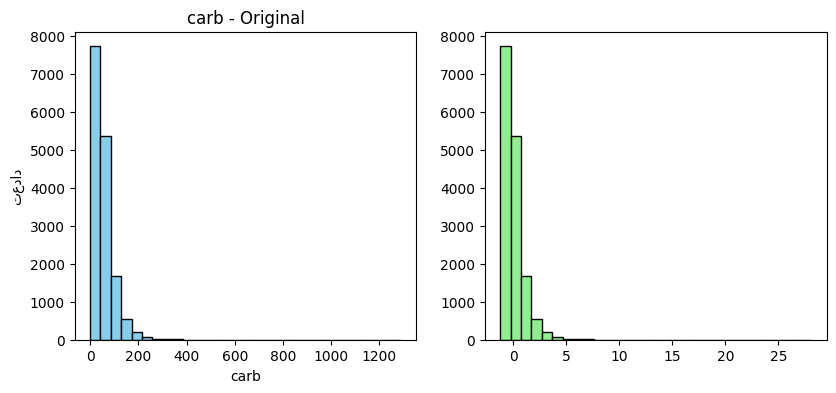

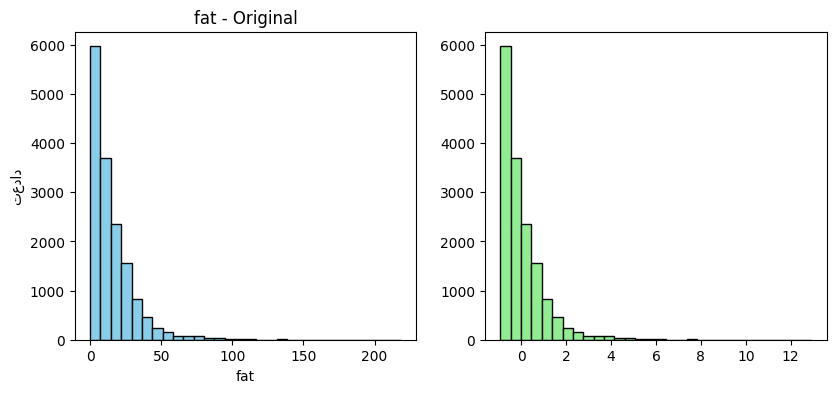

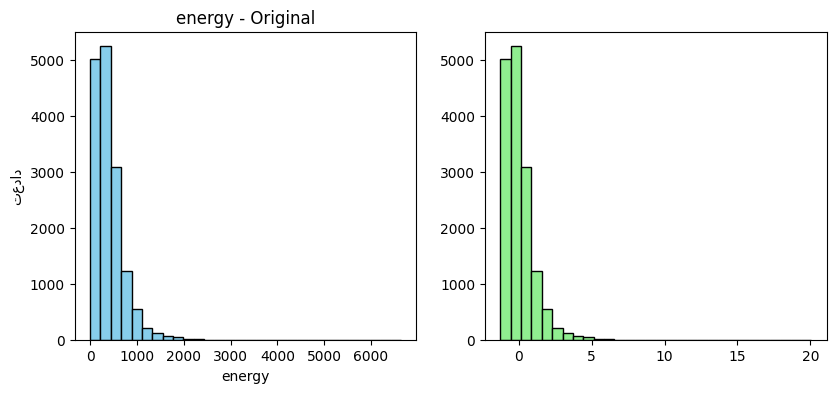

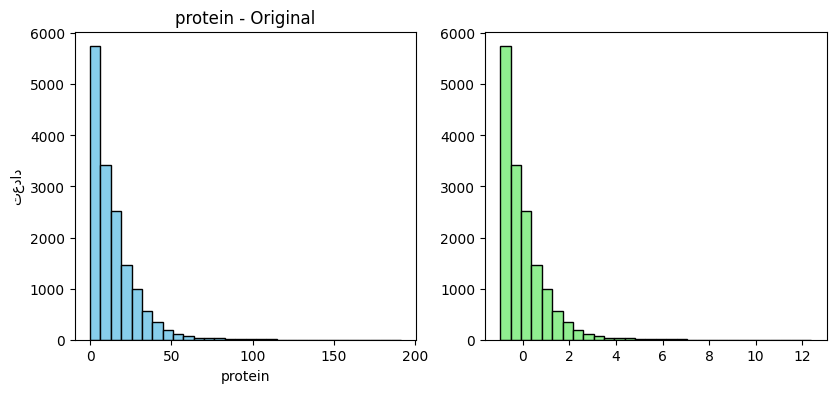

In [ ]:
import matplotlib.pyplot as plt

numeric_features = ['carb', 'fat', 'energy', 'protein']

df_original = df_train[numeric_features]

from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
df_standard = df_original.copy()
df_standard[numeric_features] = scaler_std.fit_transform(df_original)

from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()
df_minmax = df_original.copy()
df_minmax[numeric_features] = scaler_mm.fit_transform(df_original)

for col in numeric_features:
    plt.figure(figsize=(15,4))

    plt.subplot(1,3,1)
    plt.hist(df_original[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col} - Original')
    plt.xlabel(col)
    plt.ylabel('تعداد')

    # Standard Scaled
    plt.subplot(1,3,2)
    plt.hist(df_standard[col], bins=30, color='lightgreen', edgecolor='black')
